Code for the analysis of a small toy network for chapter 4 of my final year project


In [1]:
##Imports 
import numpy as np
import pandas as pd
import networkx as nx
from itertools import chain, combinations

In [2]:
print('hello world')

hello world


In [3]:
#make adjacency matrix#

A = np.zeros((6,6))
print(A)
links = [[0,4,3],[0,2,1],[1,2,1],[1,5,3],[2,3,2],[3,4,1],[3,5,1]]
for i in links:
    A[i[0]][i[1]] = i[2]
    A[i[1]][i[0]] = i[2]    

print(A)

# create position vector for plotting x graph

pos = {0 : (0,40), 1: (0,20), 2: (10,30), 3: (30,30), 4: (40,40), 5: (40,20)}





[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 3. 0.]
 [0. 0. 1. 0. 0. 3.]
 [1. 1. 0. 2. 0. 0.]
 [0. 0. 2. 0. 1. 1.]
 [3. 0. 0. 1. 0. 0.]
 [0. 3. 0. 1. 0. 0.]]


In [4]:
#demands#

odPairs = [[0,4],[0,5],[1,4],[1,5]]

d15 = 2
d16 = 1
d25 = 1
d26 = 2
demands = [d15,d16,d25,d26]

In [5]:
#Create graph#
def init_graph(A):

    g = nx.convert_matrix.from_numpy_matrix(A)
    #Add cyclepath and flow tag to edges#
    for u,v,d in g.edges(data=True):
        d['cycle'] = False
        d['flow'] = 0
    return g


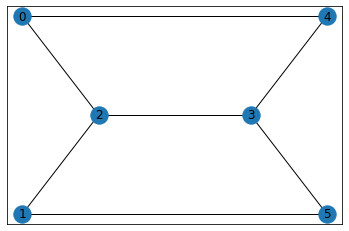

In [6]:

    
g = init_graph(A)

nx.draw_networkx(g, pos=pos)

In [7]:
def designate_infrastructure(g,cycleEdges):
    #edges is a list of the indices of edges for which cycling infrastructure will be applied#
    
    for idx in cycleEdges:
        g.edges[(idx[0],idx[-1])]['cycle'] = True
    
    return g

def clear_infrastructure(g):
    
    for u,v,d in g.edges(data=True):
        d['cycle'] = False
        
    return g
        



In [8]:
def adjust_weights(g,omega):
    #adjust the weights of edges that are not cycle paths#
    
    gCopy = g.copy()
    
    for u,v,d in gCopy.edges(data=True):
        if d['cycle'] == False:
            d['weight'] = d['weight'] * omega
            
    return gCopy



In [9]:
def get_shortest_paths(g,odPairs):
    paths = []
    
    for pair in odPairs:
        originNode = pair[0]
        destinationNode = pair[1]
        path = nx.shortest_path(g,source = originNode,target = destinationNode, weight = 'weight')
        paths.append(path)
    
    return paths

In [10]:
def edge_flows(g,paths,odPairs,demands):
    #take set of shortest paths and assign edge priority#
    gCopy = g.copy()
    for path in paths:
        od = [path[0],path[-1]]
        demandIndex = odPairs.index(od)
        demand = demands[demandIndex]
        for i in range(len(path)-1):
            gCopy.edges[(path[i],path[i+1])]['flow'] += demand
            
        
            
    return gCopy
            

In [11]:
def upgrade_graph(g,odPairs,demands,budget,nBatches,omega):
    #wrapper function 
    # g should have cycle edges designated
    gCopy = g.copy()
    
    batchBudget = budget/nBatches
    print(batchBudget)
    print(' ')
    
    for i in range(nBatches):
        print(gCopy.edges(data=True))
        print(' ')
        gAdjusted = adjust_weights(gCopy,omega)
        
        shortestPaths = get_shortest_paths(gAdjusted,odPairs)
        
        
        
        gFlows = edge_flows(gCopy,shortestPaths,odPairs,demands)
        
        print('Flows',gFlows.edges(data=True))
        
               
        edgeRanking = sorted(gFlows.edges(data=True), key=lambda t: t[2].get('flow', 1))
        edgeRanking = edgeRanking[::-1]
        
        
        
        i = 0
        upgradedLength = 0
        while upgradedLength < batchBudget:
            edgeForUpgrade = [edgeRanking[i][0],edgeRanking[i][1]]
            
            if  gCopy.edges[(edgeForUpgrade[0],edgeForUpgrade[1])]['cycle'] == False:
            
                if upgradedLength + gCopy.edges[(edgeForUpgrade[0],edgeForUpgrade[1])]['weight'] <= batchBudget:
                    upgradedLength += gCopy.edges[(edgeForUpgrade[0],edgeForUpgrade[1])]['weight']

                    gCopy.edges[(edgeForUpgrade[0],edgeForUpgrade[1])]['cycle'] = True
                else:
                    pass
            
            
            
            i +=1
        print(gCopy.edges(data=True))
        print(' ')
            
    
    return gCopy
            
            
        
        
        
    

In [12]:
def colour_cycle_edges(g):
    edgeColour = []
    for u,v,d in g.edges(data=True):
        if d['cycle'] == True:
            edgeColour.append('r')
        else:
            edgeColour.append('black')
            
    return edgeColour

In [13]:

print(g.edges(data=True))
cycleEdges = [[2,3]]
gCycleDesignated = designate_infrastructure(g,cycleEdges)
print(gCycleDesignated.edges(data=True))

print(gCycleDesignated.edges(data = True))

gAdjusted = adjust_weights(gCycleDesignated,2)

print(gAdjusted.edges(data = True))


[(0, 2, {'weight': 1.0, 'cycle': False, 'flow': 0}), (0, 4, {'weight': 3.0, 'cycle': False, 'flow': 0}), (1, 2, {'weight': 1.0, 'cycle': False, 'flow': 0}), (1, 5, {'weight': 3.0, 'cycle': False, 'flow': 0}), (2, 3, {'weight': 2.0, 'cycle': False, 'flow': 0}), (3, 4, {'weight': 1.0, 'cycle': False, 'flow': 0}), (3, 5, {'weight': 1.0, 'cycle': False, 'flow': 0})]
[(0, 2, {'weight': 1.0, 'cycle': False, 'flow': 0}), (0, 4, {'weight': 3.0, 'cycle': False, 'flow': 0}), (1, 2, {'weight': 1.0, 'cycle': False, 'flow': 0}), (1, 5, {'weight': 3.0, 'cycle': False, 'flow': 0}), (2, 3, {'weight': 2.0, 'cycle': True, 'flow': 0}), (3, 4, {'weight': 1.0, 'cycle': False, 'flow': 0}), (3, 5, {'weight': 1.0, 'cycle': False, 'flow': 0})]
[(0, 2, {'weight': 1.0, 'cycle': False, 'flow': 0}), (0, 4, {'weight': 3.0, 'cycle': False, 'flow': 0}), (1, 2, {'weight': 1.0, 'cycle': False, 'flow': 0}), (1, 5, {'weight': 3.0, 'cycle': False, 'flow': 0}), (2, 3, {'weight': 2.0, 'cycle': True, 'flow': 0}), (3, 4, {'we

In [14]:
shortestPaths = get_shortest_paths(gCycleDesignated,odPairs)
print(shortestPaths)

[[0, 4], [0, 2, 3, 5], [1, 2, 3, 4], [1, 5]]


In [15]:
gFlows = edge_flows(gCycleDesignated,shortestPaths,odPairs,demands)
print(gFlows.edges(data=True))

[(0, 2, {'weight': 1.0, 'cycle': False, 'flow': 1}), (0, 4, {'weight': 3.0, 'cycle': False, 'flow': 2}), (1, 2, {'weight': 1.0, 'cycle': False, 'flow': 1}), (1, 5, {'weight': 3.0, 'cycle': False, 'flow': 2}), (2, 3, {'weight': 2.0, 'cycle': True, 'flow': 2}), (3, 4, {'weight': 1.0, 'cycle': False, 'flow': 1}), (3, 5, {'weight': 1.0, 'cycle': False, 'flow': 1})]


In [16]:
budget = 6
nBatches = 1
omega = 3

print(gCycleDesignated.edges(data=True))

print(' ')

gUpgraded = upgrade_graph(gCycleDesignated,odPairs,demands,budget,nBatches,omega)
print(' ')
print(gUpgraded.edges(data=True))

[(0, 2, {'weight': 1.0, 'cycle': False, 'flow': 0}), (0, 4, {'weight': 3.0, 'cycle': False, 'flow': 0}), (1, 2, {'weight': 1.0, 'cycle': False, 'flow': 0}), (1, 5, {'weight': 3.0, 'cycle': False, 'flow': 0}), (2, 3, {'weight': 2.0, 'cycle': True, 'flow': 0}), (3, 4, {'weight': 1.0, 'cycle': False, 'flow': 0}), (3, 5, {'weight': 1.0, 'cycle': False, 'flow': 0})]
 
6.0
 
[(0, 2, {'weight': 1.0, 'cycle': False, 'flow': 0}), (0, 4, {'weight': 3.0, 'cycle': False, 'flow': 0}), (1, 2, {'weight': 1.0, 'cycle': False, 'flow': 0}), (1, 5, {'weight': 3.0, 'cycle': False, 'flow': 0}), (2, 3, {'weight': 2.0, 'cycle': True, 'flow': 0}), (3, 4, {'weight': 1.0, 'cycle': False, 'flow': 0}), (3, 5, {'weight': 1.0, 'cycle': False, 'flow': 0})]
 
Flows [(0, 2, {'weight': 1.0, 'cycle': False, 'flow': 3}), (0, 4, {'weight': 3.0, 'cycle': False, 'flow': 0}), (1, 2, {'weight': 1.0, 'cycle': False, 'flow': 3}), (1, 5, {'weight': 3.0, 'cycle': False, 'flow': 0}), (2, 3, {'weight': 2.0, 'cycle': True, 'flow': 6

IndexError: list index out of range

In [17]:
colourPre = colour_cycle_edges(gCycleDesignated)
print(colourPre)
print(' ')
colourPost = colour_cycle_edges(gUpgraded)
print(colourPost)
print(' ')

['black', 'black', 'black', 'black', 'r', 'black', 'black']
 


NameError: name 'gUpgraded' is not defined

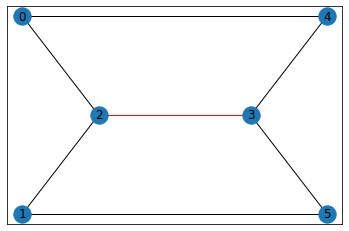

In [18]:
#draw network before upgrade#
nx.draw_networkx(gCycleDesignated, pos=pos, edge_color = colourPre)

In [19]:
#draw network after upgrade#
nx.draw_networkx(gUpgraded, pos=pos, edge_color = colourPost)

NameError: name 'gUpgraded' is not defined

6.0
 
[(0, 2, {'weight': 1.0, 'cycle': False, 'flow': 0}), (0, 4, {'weight': 3.0, 'cycle': False, 'flow': 0}), (1, 2, {'weight': 1.0, 'cycle': False, 'flow': 0}), (1, 5, {'weight': 3.0, 'cycle': False, 'flow': 0}), (2, 3, {'weight': 2.0, 'cycle': False, 'flow': 0}), (3, 4, {'weight': 1.0, 'cycle': False, 'flow': 0}), (3, 5, {'weight': 1.0, 'cycle': False, 'flow': 0})]
 
Flows [(0, 2, {'weight': 1.0, 'cycle': False, 'flow': 1}), (0, 4, {'weight': 3.0, 'cycle': False, 'flow': 1.5}), (1, 2, {'weight': 1.0, 'cycle': False, 'flow': 1}), (1, 5, {'weight': 3.0, 'cycle': False, 'flow': 1.5}), (2, 3, {'weight': 2.0, 'cycle': False, 'flow': 2}), (3, 4, {'weight': 1.0, 'cycle': False, 'flow': 1}), (3, 5, {'weight': 1.0, 'cycle': False, 'flow': 1})]
[(0, 2, {'weight': 1.0, 'cycle': False, 'flow': 0}), (0, 4, {'weight': 3.0, 'cycle': False, 'flow': 0}), (1, 2, {'weight': 1.0, 'cycle': False, 'flow': 0}), (1, 5, {'weight': 3.0, 'cycle': True, 'flow': 0}), (2, 3, {'weight': 2.0, 'cycle': True, 'flow'

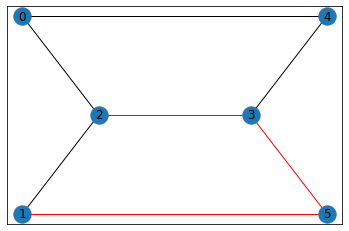

In [29]:
#Test batch vs oneshot on a network with no initial infrastructure
d15 = 1.5
d16 = 1
d25 = 1
d26 = 1.5
demands = [d15,d16,d25,d26]

g = init_graph(A)

cycleEdges = []

gCycleDesignated = designate_infrastructure(g,cycleEdges)


budget = 6
omega = 2

gUpgradedOneBatch = upgrade_graph(gCycleDesignated,odPairs,demands,budget, 1,omega)



colourOneBatch = colour_cycle_edges(gUpgradedOneBatch)





nx.draw_networkx(gUpgradedOneBatch, pos=pos, edge_color = colourOneBatch)





In [30]:
gUpgradedMultipleBatches = upgrade_graph(gCycleDesignated,odPairs,demands,budget,2,omega)
colourMultipleBatches = colour_cycle_edges(gUpgradedMultipleBatches)

3.0
 
[(0, 2, {'weight': 1.0, 'cycle': False, 'flow': 0}), (0, 4, {'weight': 3.0, 'cycle': False, 'flow': 0}), (1, 2, {'weight': 1.0, 'cycle': False, 'flow': 0}), (1, 5, {'weight': 3.0, 'cycle': False, 'flow': 0}), (2, 3, {'weight': 2.0, 'cycle': False, 'flow': 0}), (3, 4, {'weight': 1.0, 'cycle': False, 'flow': 0}), (3, 5, {'weight': 1.0, 'cycle': False, 'flow': 0})]
 
Flows [(0, 2, {'weight': 1.0, 'cycle': False, 'flow': 1}), (0, 4, {'weight': 3.0, 'cycle': False, 'flow': 1.5}), (1, 2, {'weight': 1.0, 'cycle': False, 'flow': 1}), (1, 5, {'weight': 3.0, 'cycle': False, 'flow': 1.5}), (2, 3, {'weight': 2.0, 'cycle': False, 'flow': 2}), (3, 4, {'weight': 1.0, 'cycle': False, 'flow': 1}), (3, 5, {'weight': 1.0, 'cycle': False, 'flow': 1})]
[(0, 2, {'weight': 1.0, 'cycle': False, 'flow': 0}), (0, 4, {'weight': 3.0, 'cycle': False, 'flow': 0}), (1, 2, {'weight': 1.0, 'cycle': False, 'flow': 0}), (1, 5, {'weight': 3.0, 'cycle': False, 'flow': 0}), (2, 3, {'weight': 2.0, 'cycle': True, 'flow

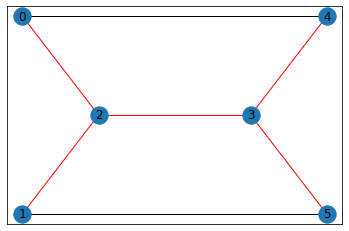

In [31]:
nx.draw_networkx(gUpgradedMultipleBatches, pos=pos, edge_color = colourMultipleBatches)

In [32]:
def scoring_function(g,odPairs,demands,omega=2):
    gAdjusted = adjust_weights(g,omega)
    shortestPaths = get_shortest_paths(gAdjusted,odPairs)
    pctCycle = []
    for path in shortestPaths:
        pathLen = 0
        cycleLen = 0
        for i in range(len(path)-1):
            edge = [path[i],path[i+1]]
            pathLen += g.edges[(edge[0],edge[1])]['weight']
            if g.edges[(edge[0],edge[1])]['cycle'] == True:
                cycleLen += g.edges[(edge[0],edge[1])]['weight']
                
        pct = (cycleLen/pathLen) 
        pctCycle.append(pct)
    
    score = 0
    
    for i in range(len(demands)):
        score += demands[i] * pctCycle[i]
        
    return score/sum(demands)
            
    

In [33]:
oneshotScores = scoring_function(gUpgradedOneBatch,odPairs,demands,omega = 2)
print(oneshotScores)

0.55


In [34]:
multiBatchScores = scoring_function(gUpgradedMultipleBatches,odPairs,demands,omega = 2)
print(multiBatchScores)

1.0


In [35]:
def powerset(seq):
    """
    Returns all the subsets of this set. This is a generator.
    """
    if len(seq) <= 1:
        yield seq
        yield []
    else:
        for item in powerset(seq[1:]):
            yield [seq[0]]+item
            yield item



In [36]:
def find_optimal(g,odPairs,demands,omega,budget):
    gCopy = g.copy()
    edges = list(gCopy.edges())
    
    pSet = [x for x in powerset(edges)]
    scores = []
    counter = 0
    counterList = []
    for edgeSet in pSet:
        gCopy = g
        lenSet = 0
        for edge in edgeSet:
            lenSet += gCopy.edges[edge]['weight']
        if lenSet <= budget:
            
            gCycle = designate_infrastructure(gCopy,edgeSet)
           
            
            score = scoring_function(gCycle,odPairs,demands,omega)
            scores.append(score)
            counterList.append(counter) 
            
            
            gCycle = clear_infrastructure(gCycle)
        counter += 1
    
    
    optimalIndexCounter = scores.index(max(scores))
    
   
    
    optimalEdgeSet = pSet[counterList[optimalIndexCounter]]
    
    gCopy = clear_infrastructure(gCopy)
    
    gOptimal = designate_infrastructure(gCopy,optimalEdgeSet)
    
    return gOptimal, max(scores)
            
            
            
        
    

In [37]:
g = init_graph(A)
gOptimal,score = find_optimal(g,odPairs,demands,omega,budget)

print('')
print(gOptimal.edges(data=True))
print(' ')
print(score)


[(0, 2, {'weight': 1.0, 'cycle': True, 'flow': 0}), (0, 4, {'weight': 3.0, 'cycle': False, 'flow': 0}), (1, 2, {'weight': 1.0, 'cycle': True, 'flow': 0}), (1, 5, {'weight': 3.0, 'cycle': False, 'flow': 0}), (2, 3, {'weight': 2.0, 'cycle': True, 'flow': 0}), (3, 4, {'weight': 1.0, 'cycle': True, 'flow': 0}), (3, 5, {'weight': 1.0, 'cycle': True, 'flow': 0})]
 
1.0
